In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [3]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = data.frame
df.loc[df.sample(frac=0.05).index, 'MedInc'] = np.nan
df.loc[df.sample(frac=0.03).index, 'HouseAge'] = np.nan
df.isnull().sum()

MedInc         1032
HouseAge        619
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
MedHouseVal       0
dtype: int64

In [5]:
df['MedInc'] = df['MedInc'].fillna(df['MedInc'].median())
df['HouseAge'] = df['HouseAge'].fillna(df['HouseAge'].median())

In [6]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [7]:
iter_imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df), columns=df.columns)

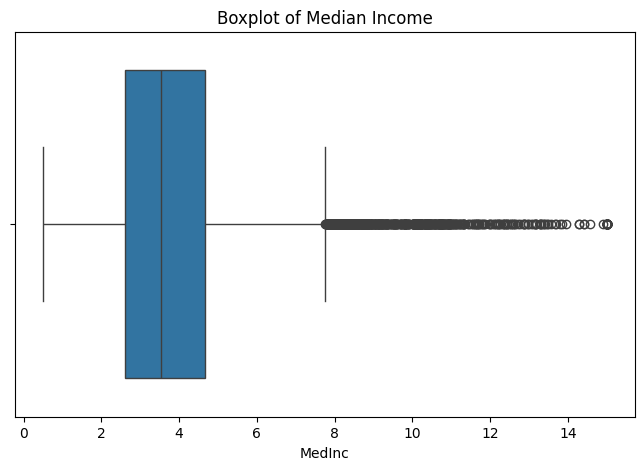

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['MedInc'])
plt.title("Boxplot of Median Income")
plt.show()

In [9]:
z_scores = np.abs(stats.zscore(df['MedInc'],nan_policy='omit'))
outliers = df[z_scores > 3]

In [10]:
Q1 = df['MedInc'].quantile(0.25)
Q3 = df['MedInc'].quantile(0.75)
IQR = Q3 - Q1
outliers2 = df[(df['MedInc'] < (Q1 - 1.5 * IQR)) | (df['MedInc'] > (Q3 + 1.5 * IQR))]

In [11]:
upper_limit = df['MedInc'].quantile(0.99)
lower_limit = df['MedInc'].quantile(0.01)
df['MedInc'] = np.where(df['MedInc'] > upper_limit, upper_limit, 
                        np.where(df['MedInc'] < lower_limit, lower_limit, df['MedInc']))

In [12]:
# Step 1: Create missing values 
df.loc[df.sample(frac=0.05).index, 'MedInc'] = np.nan
# Step 2: Impute missing values using KNN
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
# Step 3: Detect outliers with Z-score
z_scores = np.abs(stats.zscore(df_imputed['MedInc']))
outliers = df_imputed[z_scores > 3]
print(f"Detected {len(outliers)} outliers.")
# Step 4: Cap extreme values
upper = df_imputed['MedInc'].quantile(0.99)
lower = df_imputed['MedInc'].quantile(0.01)
df_imputed['MedInc'] = np.clip(df_imputed['MedInc'], lower, upper)
print(df_imputed.isnull().sum())
print(df_imputed.describe())

Detected 374 outliers.
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.842039     28.668508      5.429000      1.096675   1425.476744   
std        1.729869     12.391653      2.474173      0.473911   1132.462122   
min        1.112929      1.000000      0.846154      0.333333      3.000000   
25%        2.642900     19.000000      4.440716      1.006079    787.000000   
50%        3.540000     29.000000      5.229129      1.048780   1166.000000   
75%        4.648500     37.000000      6.052381      1.099526   1725.000000   
max       10.453730     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  

In [13]:
df_imputed.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.325200,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3.155433,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.846200,29.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
